In [117]:
from elasticsearch import Elasticsearch
from pprint import pprint

es = Elasticsearch("http://localhost:9200/")
client_info = es.info()
pprint(client_info.body)

{'cluster_name': 'docker-cluster',
 'cluster_uuid': 'S88XwI8mTkSFeJBJ4J532w',
 'name': 'c0d7ef8c0833',
 'tagline': 'You Know, for Search',
 'version': {'build_date': '2024-08-05T10:05:34.233336849Z',
             'build_flavor': 'default',
             'build_hash': '1a77947f34deddb41af25e6f0ddb8e830159c179',
             'build_snapshot': False,
             'build_type': 'docker',
             'lucene_version': '9.11.1',
             'minimum_index_compatibility_version': '7.0.0',
             'minimum_wire_compatibility_version': '7.17.0',
             'number': '8.15.0'}}


In [118]:
es.indices.delete(index="my_index",ignore_unavailable=True)
es.indices.create(index="my_index",
                  settings={
                      "index":{
                      "number_of_shards": 3,
                      "number_of_replicas": 2
                      }
                  })

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [119]:
documents = {
    'title':'title',
    'text':'text',
    'created_on':'2024-09-22'
}

response = es.index(index="my_index",document=documents)
response

ObjectApiResponse({'_index': 'my_index', '_id': '5PAV3ZMBwUvK-SJlwnbj', '_version': 1, 'result': 'created', '_shards': {'total': 3, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [120]:
dummy_data = [
  {
    "title": "Sample Title 1",
    "text": "This is the first sample document text.",
    "created_on": "2024-09-22"
  },
  {
    "title": "Sample Title 2",
    "text": "Here is another example of a document.",
    "created_on": "2024-09-24"
  },
  {
    "title": "Sample Title 3",
    "text": "The content of the third document goes here.",
    "created_on": "2024-09-24"
  }
]

In [121]:
def insert_document(document):
    response = es.index(index="my_index",document=documents)
    return response

def print_info(response):
    print(f"""Document ID: {response['_id']} is {
        response['result']} and is split into {response['_shards']['total']} shards""")
    
for document in dummy_data:
    response = insert_document(document)
    print_info(response)

Document ID: 5fAV3ZMBwUvK-SJlw3Y7 is created and is split into 3 shards
Document ID: 5vAV3ZMBwUvK-SJlw3ZD is created and is split into 3 shards
Document ID: 5_AV3ZMBwUvK-SJlw3ZP is created and is split into 3 shards


In [122]:
index_mapping = es.indices.get_mapping(index="my_index")
pprint(index_mapping)

ObjectApiResponse({'my_index': {'mappings': {'properties': {'created_on': {'type': 'date'}, 'text': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}, 'title': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}}}}})


In [123]:
es.indices.delete(index="my_index",ignore_unavailable=True)
es.indices.create(index="my_index")

mapping = {
    'properties': {
        'created_on': {'type': 'date'},
        'text': {
            'type': 'text',
            'fields': {
                'keyword': {
                    'type': 'keyword',
                    'ignore_above': 256
                }
            }
        },
        'title': {
            'type': 'text',
            'fields': {
                'keyword': {
                    'type': 'keyword',
                    'ignore_above': 256
                }
            }
        }
    }
}

es.indices.put_mapping(index="my_index",body=mapping)
index_mapping = es.indices.get_mapping(index="my_index")
pprint(index_mapping["my_index"]["mappings"]["properties"])

{'created_on': {'type': 'date'},
 'text': {'fields': {'keyword': {'ignore_above': 256, 'type': 'keyword'}},
          'type': 'text'},
 'title': {'fields': {'keyword': {'ignore_above': 256, 'type': 'keyword'}},
           'type': 'text'}}


In [124]:
es.indices.delete(index='other_common_data_types_index',
                  ignore_unavailable=True)
es.indices.create(
    index='other_common_data_types_index',
    mappings={
        "properties": {
            "book_reference": {
                "type": "keyword"
            },
            "price": {
                "type": "float"
            },
            "publish_date": {
                "type": "date"
            },
            "is_available": {
                "type": "boolean"
            },
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'other_common_data_types_index'})

In [125]:
document = {
    "book_reference": "978-1617294433",
    "price": 44.99,
    "publish_date": "2021-06-30",
    "is_available": True
}
response = es.index(index='other_common_data_types_index', body=document)
response

ObjectApiResponse({'_index': 'other_common_data_types_index', '_id': '6PAV3ZMBwUvK-SJlxXZU', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [126]:
es.indices.delete(index='object_index', ignore_unavailable=True)
es.indices.create(
    index='object_index',
    mappings={
        "properties": {
            "author": {
                "properties": {
                    "first_name": {
                        "type": "text"
                    },
                    "last_name": {
                        "type": "text"
                    }
                }
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'object_index'})

In [127]:
document = {
    "author": {
        "first_name": "Imad",
        "last_name": "Saddik"
    }
}
response = es.index(index='object_index', body=document)
response

ObjectApiResponse({'_index': 'object_index', '_id': '6fAV3ZMBwUvK-SJlxnZW', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [128]:
es.indices.delete(index='flattened_object_index', ignore_unavailable=True)
es.indices.create(
    index='flattened_object_index',
    mappings={
        "properties": {
            "author": {
                "type": "flattened"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'flattened_object_index'})

In [129]:
document = {
    "author": {
        "first_name": "Imad",
        "last_name": "Saddik"
    }
}
response = es.index(index='flattened_object_index', body=document)
response

ObjectApiResponse({'_index': 'flattened_object_index', '_id': '6vAV3ZMBwUvK-SJlx3Y8', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [130]:
es.indices.delete(index='nested_object_index', ignore_unavailable=True)
es.indices.create(
    index='nested_object_index',
    mappings={
        "properties": {
            "user": {
                "type": "nested",
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'nested_object_index'})

In [131]:
documents = [
    {
        "first": "John",
        "last": "Smith"
    },
    {
        "first": "Imad",
        "last": "Saddik"
    }
]
response = es.index(index='nested_object_index', body={"user": documents})
response

ObjectApiResponse({'_index': 'nested_object_index', '_id': '6_AV3ZMBwUvK-SJlyHYu', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [132]:
es.indices.delete(index='text_index', ignore_unavailable=True)
es.indices.create(
    index='text_index',
    mappings={
        "properties": {
            "email_body": {
                "type": "text"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'text_index'})

In [133]:
document = {
    "email_body": "Hello, this is a test email."
}
response = es.index(index='text_index', body=document)
response

ObjectApiResponse({'_index': 'text_index', '_id': '7PAV3ZMBwUvK-SJlyXY9', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [134]:
es.indices.delete(index='text_completion_index', ignore_unavailable=True)
es.indices.create(
    index='text_completion_index',
    mappings={
        "properties": {
            "suggest": {
                "type": "completion"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'text_completion_index'})

In [135]:
document_1 = {
    "suggest": {
        "input": ["Mars", "Planet"]
    }
}

document_2 = {
    "suggest": {
        "input": ["Andromeda", "Galaxy"]
    }
}

es.index(index='text_completion_index', body=document_1)
es.index(index='text_completion_index', body=document_2)

ObjectApiResponse({'_index': 'text_completion_index', '_id': '7vAV3ZMBwUvK-SJlynY0', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1, '_primary_term': 1})

In [136]:
es.indices.delete(index='geo_point_index', ignore_unavailable=True)
es.indices.create(
    index='geo_point_index',
    mappings={
        "properties": {
            "location": {
                "type": "geo_point"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'geo_point_index'})

In [137]:
document = {
    "text": "Geopoint as an object using GeoJSON format",
    "location": {
        "type": "Point",
        "coordinates": [
            -71.34,
            41.12
        ]
    }
}
response = es.index(index='geo_point_index', body=document)
response

ObjectApiResponse({'_index': 'geo_point_index', '_id': '7_AV3ZMBwUvK-SJly3Yu', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [138]:
es.indices.delete(index='geo_shape_index', ignore_unavailable=True)
es.indices.create(
    index='geo_shape_index',
    mappings={
        "properties": {
            "location": {
                "type": "geo_shape"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'geo_shape_index'})

In [139]:
document_1 = {
    "location": {
        "type": "LineString",
        "coordinates": [
            [
                -77.03653,
                38.897676
            ],
            [
                -77.009051,
                38.889939
            ]
        ]
    }
}
document_2 = {
    "location": {
        "type": "Polygon",
        "coordinates": [
            [
                [100, 0],
                [101, 0],
                [101, 1],
                [100, 1],
                [100, 0],
            ],
            [
                [100.2, 0.2],
                [100.8, 0.2],
                [100.8, 0.8],
                [100.2, 0.8],
                [100.2, 0.2],
            ]
        ]
    }
}

es.index(index='geo_shape_index', body=document_1)
es.index(index='geo_shape_index', body=document_2)

ObjectApiResponse({'_index': 'geo_shape_index', '_id': '8fAV3ZMBwUvK-SJlzHZh', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1, '_primary_term': 1})

In [140]:
es.indices.delete(index='point_index', ignore_unavailable=True)
es.indices.create(
    index='point_index',
    mappings={
        "properties": {
            "location": {
                "type": "point"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'point_index'})

In [141]:
document = {
    "location": {
        "type": "Point",
        "coordinates": [
            -71.34,
            41.12
        ]
    }
}

response = es.index(index='point_index', body=document)
response

ObjectApiResponse({'_index': 'point_index', '_id': '8vAV3ZMBwUvK-SJlzXZX', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

In [142]:
from elasticsearch import Elasticsearch

es = Elasticsearch("http://localhost:9200/")
es.indices.delete(index="my_index",ignore_unavailable=True)
es.indices.create(index="my_index")

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [143]:
import json
from tqdm import tqdm

document_ids = []
for document in tqdm(dummy_data,total=len(dummy_data)):
    response = es.index(index="my_index",document=document)
    document_ids.append(response['_id'])

100%|██████████| 3/3 [00:00<00:00, 44.50it/s]


In [144]:
# response = es.delete(index="my_index", id=document_ids[0])

In [145]:
pprint(response.body)

{'_id': '9fAV3ZMBwUvK-SJlznaI',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 2,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 1,
 'result': 'created'}


In [146]:
response = es.get(index="my_index", id=document_ids[0])
pprint(response.body)

{'_id': '8_AV3ZMBwUvK-SJlznZL',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 0,
 '_source': {'created_on': '2024-09-22',
             'text': 'This is the first sample document text.',
             'title': 'Sample Title 1'},
 '_version': 1,
 'found': True}


In [147]:
response = es.count(index="my_index")
print(response['count'])

0


In [148]:
response

ObjectApiResponse({'count': 0, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}})

In [149]:
query = {
    "range": {
        "created_on": {
            "gte": "2024-09-24",
            "lte": "2024-09-24",
            "format": "yyyy-MM-dd"
        }
    }
}

response = es.count(index='my_index', query=query)
count = response["count"]

print(f"The number of documents in the index is {count}")

The number of documents in the index is 0


In [150]:
response = es.indices.exists(index="my_index")
response.body

True

In [151]:
response = es.update(
    index="my_index",
    id= document_ids[0],
    script={
        "source": "ctx._source.title = params.title",
        "params": {"title": "New Title"}
    }
)
pprint(response.body)

{'_id': '8_AV3ZMBwUvK-SJlznZL',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 3,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 2,
 'result': 'updated'}


In [152]:
response = es.update(
    index="my_index",
    id=document_ids[0],
    script={
        "source":"ctx._source.new_field = 'dmm'"
    }
)
pprint(response.body)

{'_id': '8_AV3ZMBwUvK-SJlznZL',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 4,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 3,
 'result': 'updated'}


In [153]:
response = es.get(index="my_index",id=document_ids[0])
pprint(response.body)

{'_id': '8_AV3ZMBwUvK-SJlznZL',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 4,
 '_source': {'created_on': '2024-09-22',
             'new_field': 'dmm',
             'text': 'This is the first sample document text.',
             'title': 'New Title'},
 '_version': 3,
 'found': True}


In [154]:
response = es.update(index="my_index",id=document_ids[0],doc={"next_field":"dmm2"})

In [155]:
response = es.get(index="my_index",id=document_ids[0])
pprint(response.body)

{'_id': '8_AV3ZMBwUvK-SJlznZL',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 5,
 '_source': {'created_on': '2024-09-22',
             'new_field': 'dmm',
             'next_field': 'dmm2',
             'text': 'This is the first sample document text.',
             'title': 'New Title'},
 '_version': 4,
 'found': True}


In [156]:
response = es.update(index="my_index", id=document_ids[0], script={"source":"ctx._source.remove('new_field')"})

In [157]:
response = es.get(index="my_index", id=document_ids[0])
pprint(response.body)

{'_id': '8_AV3ZMBwUvK-SJlznZL',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 6,
 '_source': {'created_on': '2024-09-22',
             'next_field': 'dmm2',
             'text': 'This is the first sample document text.',
             'title': 'New Title'},
 '_version': 5,
 'found': True}


In [158]:
response = es.update(
    index="my_index",
    id="1",
    doc={
        "book_id":1234,
        "book_name": "A book"
    },
    doc_as_upsert=True
)

pprint(response.body)

{'_id': '1',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 7,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 1,
 'result': 'created'}


In [159]:
response = es.get(index="my_index", id='1')
pprint(response.body)

{'_id': '1',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 7,
 '_source': {'book_id': 1234, 'book_name': 'A book'},
 '_version': 1,
 'found': True}


In [160]:
es.count(index="my_index")

ObjectApiResponse({'count': 0, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}})

In [161]:
es.indices.delete(index="my_index", ignore_unavailable=True)
es.indices.create(index="my_index")

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [162]:
response = es.bulk(
    operations=[
        {
            "index": {
                "_index": "my_index",
                "_id": "1"
            }
        },
        # Source 1
        {
            "title": "Sample Title 1",
            "text": "This is the first sample document text.",
            "created_on": "2024-09-22"
        },
        # Action 2
        {
            "index": {
                "_index": "my_index",
                "_id": "2"
            }
        },
        # Source 2
        {
            "title": "Sample Title 2",
            "text": "Here is another example of a document.",
            "created_on": "2024-09-24"
        },
        # Action 3
        {
            "index": {
                "_index": "my_index",
                "_id": "3"
            }
        },
        # Source 3
        {
            "title": "Sample Title 3",
            "text": "The content of the third document goes here.",
            "created_on": "2024-09-24"
        },
        # Action 4
        {
            "update": {
                "_id": "1",
                "_index": "my_index"
            }
        },
        # Source 4
        {
            "doc": {
                "title": "New Title"
            }
        },
        # Action 5
        {
            "update": {
                "_id": "2",
                "_index": "my_index"
            }
        },
        # Source 5
        {
            "doc": {
                "new_field": "dummy_value"
            }
        },
        # Action 6
        {
            "delete": {
                "_index": "my_index",
                "_id": "3"
            }
        },
    ]
)

pprint(response.body)

{'errors': False,
 'items': [{'index': {'_id': '1',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 0,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': '2',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 1,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': '3',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 2,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
        

In [163]:
es.indices.delete(index="index_1", ignore_unavailable=True)
es.indices.create(index="index_1")

es.indices.delete(index="index_2", ignore_unavailable=True)
es.indices.create(index="index_2")

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'index_2'})

In [164]:
for document in tqdm(dummy_data, total=len(dummy_data)):
    es.index(index="index_1",document=document)

for document in tqdm(dummy_data, total=len(dummy_data)):
    es.index(index="index_2",document=document)

100%|██████████| 3/3 [00:00<00:00, 62.29it/s]


In [165]:
response = es.search(
    index="index_1",
    body={
        "query": {"match_all":{}}
    }
)

pprint(f"Found {response['hits']['total']['value']} document in index_1")

'Found 0 document in index_1'


In [166]:
response = es.search(
    index="index_2",
    body={
        "query": {"match_all":{}}
    }
)

pprint(f"Found {response['hits']['total']['value']} document in index_2")

'Found 0 document in index_2'


In [167]:
response = es.search(
    index="index_1,index_2",
    body={
        "query": {"match_all":{}}
    }
)

pprint(f"Found {response['hits']['total']['value']} document in index_1,index_2")

'Found 0 document in index_1,index_2'


In [168]:
response = es.search(
    index="index*",
    body={
        "query": {"match_all":{}}
    }
)

pprint(f"Found {response['hits']['total']['value']} document in index_1,index_2")

'Found 0 document in index_1,index_2'


In [169]:
response = es.search(
    index="my_index",
    body={
        "query": {
            "term": {
                "created_on":"2024-09-22"
            }
        }
    }
)

pprint(response.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'hits': {'hits': [],
          'max_score': None,
          'total': {'relation': 'eq', 'value': 0}},
 'timed_out': False,
 'took': 1}


In [170]:
response = es.search(
    index="my_index",
    body={"query": {"match": {"text": "document"}}}
)

pprint(response.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'hits': {'hits': [],
          'max_score': None,
          'total': {'relation': 'eq', 'value': 0}},
 'timed_out': False,
 'took': 3}


In [171]:
response = es.search(
    index="my_index",
    body={
        "query": {
            "range":{
                "created_on": {
                    "lte":"2024-09-22"
                }
            }
        }
    }
)

pprint(response.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'hits': {'hits': [],
          'max_score': None,
          'total': {'relation': 'eq', 'value': 0}},
 'timed_out': False,
 'took': 1}


In [172]:
response = es.search(
    index="my_index",
    body={
        "query": {
            "bool": {
                "must": [
                    {"match": {"text": "third"}},
                    {"range":{
                        "created_on":{
                            "gte":"2024-09-24",
                            "lte":"2024-09-24"
                        }
                    }}
                ]
            }
        }
    }
)

pprint(response.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'hits': {'hits': [],
          'max_score': None,
          'total': {'relation': 'eq', 'value': 0}},
 'timed_out': False,
 'took': 1}


In [173]:
dummy_data_2=[
    {
        "message": "This is an important keyword search result.",
        "age": 25,
        "price": 100.0
    },
    {
        "message": "Another search result with an important keyword.",
        "age": 30,
        "price": 150.0
    },
    {
        "message": "Keyword match in this result as well.",
        "age": 40,
        "price": 200.0
    },
    {
        "message": "Important keyword again in this document.",
        "age": 35,
        "price": 120.0
    },
    {
        "message": "Final document with the important keyword.",
        "age": 28,
        "price": 180.0
    }
]



In [174]:
operations = []
for document in dummy_data_2:
    operations.append({"index":{"_index":"my_index"}})
    operations.append(document)

es.bulk(operations=operations)

ObjectApiResponse({'errors': False, 'took': 502578, 'items': [{'index': {'_index': 'my_index', '_id': '_PAV3ZMBwUvK-SJl1HYe', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 6, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'my_index', '_id': '_fAV3ZMBwUvK-SJl1HYe', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 7, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'my_index', '_id': '_vAV3ZMBwUvK-SJl1HYe', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 8, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'my_index', '_id': '__AV3ZMBwUvK-SJl1HYe', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 9, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'my_index', '_id': 'APAV3ZMBwUvK-SJl1Hce', '_version': 1, 'result': 'created', '_shards': {'t

In [175]:
response = es.search(
    index="my_index",
    body={"query":{
        "match_all":{}
    },
    "size":10,
    "from":10
    }
)

for hit in response['hits']['hits']:
    print(hit['_source'])

In [176]:
response = es.search(
    index="my_index",
    body={"query": {"match": {"message": "search keyword"}},
          "timeout":"10s"}
)

pprint(response.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'hits': {'hits': [],
          'max_score': None,
          'total': {'relation': 'eq', 'value': 0}},
 'timed_out': False,
 'took': 1}


In [177]:
response = es.search(
    index="my_index",
    body={"query": {"match_all": {}},
          "aggs": {
              "avg_age":{
                  "avg":{
                      "field":"age"
                  }
              }
          }}
)

pprint(response['aggregations']['avg_age']['value'])

None


In [178]:
response = es.search(
    index="my_index",
    body={
        "query": {
            "match": {
                "message": "important keyword"
            }
        },
        "aggs": {
            "max_price": {
                "max": {
                    "field": "price"
                }
            }
        },
        "size": 5,
        "from": 20,
        "timeout": "5s"
    }
)

for hit in response['hits']['hits']:
    print(hit['_source'])

pprint(response['aggregations']['max_price']['value'])

None


In [179]:
es.indices.delete(index="my_index", ignore_unavailable=True)
es.indices.create(index="my_index",
                  mappings={
                      "properties":{
                          "sides_length":{
                              "type":"dense_vector",
                              "dims":4
                          },
                          "shape":{
                              "type":"keyword"
                          }
                      }
                  })

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [180]:
response = es.index(
    index="my_index",
    id=1,
    document={
        "shape":"square",
        "sides_length":[5,5,5,5]
    }
)

pprint(response.body)

{'_id': '1',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 0,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 1,
 'result': 'created'}


In [181]:
es.indices.get_mapping(index="my_index").body

{'my_index': {'mappings': {'properties': {'shape': {'type': 'keyword'},
    'sides_length': {'type': 'dense_vector',
     'dims': 4,
     'index': True,
     'similarity': 'cosine',
     'index_options': {'type': 'int8_hnsw',
      'm': 16,
      'ef_construction': 100}}}}}}

In [182]:
es.indices.delete(index="my_index",ignore_unavailable=True)
es.indices.create(index="my_index",
                  mappings={
                      "properties": {
                          "embedding":{
                              "type":"dense_vector"
                          }
                      }
                  })

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [183]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

In [184]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [185]:
def get_embedding(text):
    return model.encode(text)

In [186]:
operations = []

for document in tqdm(dummy_data, total=len(dummy_data)):
    operations.append({"index":{"_index":"my_index"}})
    operations.append({
        **document,
        "embedding":get_embedding(document['text'])
    })

response = es.bulk(operations=operations)
pprint(response.body)

100%|██████████| 3/3 [00:00<00:00, 141.99it/s]

{'errors': False,
 'items': [{'index': {'_id': 'AfAV3ZMBwUvK-SJl4XeC',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 0,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'AvAV3ZMBwUvK-SJl4XeC',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 1,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'A_AV3ZMBwUvK-SJl4XeC',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 2,
                      '_shards': {'failed': 0, 'successful': 1, '

In [187]:
response = es.search(
    index="my_index",
    body={
        "query": {
            "match_all": {}
        }
    }
)

pprint(response['hits']['hits'])

[]


In [188]:
response = es.indices.get_mapping(
    index="my_index"
)
pprint(response.body)

{'my_index': {'mappings': {'properties': {'created_on': {'type': 'date'},
                                          'embedding': {'dims': 384,
                                                        'index': True,
                                                        'index_options': {'ef_construction': 100,
                                                                          'm': 16,
                                                                          'type': 'int8_hnsw'},
                                                        'similarity': 'cosine',
                                                        'type': 'dense_vector'},
                                          'text': {'fields': {'keyword': {'ignore_above': 256,
                                                                          'type': 'keyword'}},
                                                   'type': 'text'},
                                          'title': {'fields': {'keyword': {'ignore_above':

In [189]:
es.indices.delete(index="my_index", ignore_unavailable=True)
es.indices.create(
    index="my_index",
    mappings={
        "properties": {
            "embedding":{
                "type": "dense_vector",
            }
        }
        
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [190]:
documents=[
  {
    "id": 1,
    "title": "The Solar System",
    "content": "The Solar System consists of the Sun and the objects that orbit it, including eight planets, their moons, dwarf planets, and countless small bodies like asteroids and comets."
  },
  {
    "id": 2,
    "title": "Black Holes",
    "content": "A black hole is a region of space where the gravitational pull is so strong that nothing, not even light, can escape from it. They are formed when massive stars collapse under their own gravity."
  },
  {
    "id": 3,
    "title": "Galaxies",
    "content": "Galaxies are vast systems that consist of stars, stellar remnants, interstellar gas, dust, and dark matter. The Milky Way is the galaxy that contains our Solar System."
  },
  {
    "id": 4,
    "title": "The Big Bang Theory",
    "content": "The Big Bang Theory is the leading explanation about how the universe began. It suggests that the universe was once in an extremely hot and dense state and has been expanding ever since."
  },
  {
    "id": 5,
    "title": "Exoplanets",
    "content": "Exoplanets, or extrasolar planets, are planets that exist outside our solar system. They vary greatly in size and composition and are often found using methods like the transit method and radial velocity."
  },
  {
    "id": 6,
    "title": "The Life Cycle of Stars",
    "content": "Stars are born from clouds of gas and dust in space. They undergo a life cycle that includes stages such as main sequence, red giant, and, ultimately, either a supernova explosion or a gentle fade into a white dwarf."
  },
  {
    "id": 7,
    "title": "Astrobiology",
    "content": "Astrobiology is the study of the origin, evolution, distribution, and future of life in the universe. It combines elements of biology, chemistry, and planetary science."
  },
  {
    "id": 8,
    "title": "Dark Matter",
    "content": "Dark matter is a type of matter that does not emit light or energy. It cannot be observed directly but is believed to make up about 27% of the universe's total mass and energy."
  },
  {
    "id": 9,
    "title": "The Expanding Universe",
    "content": "The universe has been expanding since the Big Bang. Observations of distant galaxies show that they are moving away from us, which supports the idea of an expanding universe."
  },
  {
    "id": 10,
    "title": "Space Exploration",
    "content": "Space exploration involves the use of space technology to explore outer space. It includes missions to planets, moons, and other celestial bodies, aiming to discover more about the universe."
  }
]

In [191]:
def get_embedding(text):
    return model.encode(text)

operations = []
for document in tqdm(documents, total=len(documents)):
    operations.append({"index":{"_index":"my_index"}})
    operations.append({
        **document,
        "embedding":get_embedding(document['content'])
    })

response = es.bulk(operations=operations)
pprint(response.body)

100%|██████████| 10/10 [00:00<00:00, 143.53it/s]

{'errors': False,
 'items': [{'index': {'_id': 'BPAV3ZMBwUvK-SJl43cj',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 0,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'BfAV3ZMBwUvK-SJl43cj',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 1,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'BvAV3ZMBwUvK-SJl43cj',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 2,
                      '_shards': {'failed': 0, 'successful': 1, '

In [192]:
response = es.search(
    index="my_index",
    body={
        "query":{
            "match_all": {}
        }
    }
)

pprint(response['hits']['hits'])

[]


In [193]:
response = es.indices.get_mapping(
    index="my_index"
)

pprint(response.body)

{'my_index': {'mappings': {'properties': {'content': {'fields': {'keyword': {'ignore_above': 256,
                                                                             'type': 'keyword'}},
                                                      'type': 'text'},
                                          'embedding': {'dims': 384,
                                                        'index': True,
                                                        'index_options': {'ef_construction': 100,
                                                                          'm': 16,
                                                                          'type': 'int8_hnsw'},
                                                        'similarity': 'cosine',
                                                        'type': 'dense_vector'},
                                          'id': {'type': 'long'},
                                          'title': {'fields': {'keyword': {'ignore_above'

In [194]:
query = "What is a black hole ?"
embedding_query = get_embedding(query)

In [195]:
result = es.search(
    index="my_index",
    knn={
        "field":"embedding",
        "query_vector": embedding_query,
        "num_candidates":5,
        "k":3
    }
)

pprint(result.body)

{'_shards': {'failed': 0, 'skipped': 0, 'successful': 1, 'total': 1},
 'hits': {'hits': [],
          'max_score': None,
          'total': {'relation': 'eq', 'value': 0}},
 'timed_out': False,
 'took': 1}


In [196]:
hits = result.body['hits']['hits']
for hit in hits:
    print(f"Title: {hit['_source']['title']}")
    print(f"Content: {hit['_source']['content']}")
    print(f"Score: {hit['_score']}")
    print("*"*100)

    

In [197]:
index_name = "my_index"
mapping = {
    "mappings":{
        "properties":{
            "timestamp": {"type":"date"},
            "value": {"type":"float"},
            "category": {"type":"keyword"},
            "description": {"type":"text"},
            "id" : {"type": "keyword"}
        }
    },
    "settings": {
        "number_of_shards":1,
        "number_of_replicas":0
    }
}

es.indices.delete(index=index_name, ignore_unavailable=True)
es.indices.create(index=index_name,body=mapping)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [198]:
base_documents = [
    {
        "category": "A",
        "value": 100,
        "description": "First sample document"
    },
    {
        "category": "B",
        "value": 200,
        "description": "Second sample document"
    },
    {
        "category": "C",
        "value": 300,
        "description": "Third sample document"
    },
    {
        "category": "D",
        "value": 400,
        "description": "Fourth sample document"
    },
    {
        "category": "E",
        "value": 500,
        "description": "Fifth sample document"
    }
]

In [199]:
import random
from datetime import datetime, timedelta

def generate_bulk_data(base_documents, target_size=100000):
    documents = []
    base_count = len(base_documents)
    duplications_needed = target_size // base_count

    base_timestamp = datetime.now()

    for i in range(duplications_needed):
        for document in base_documents:
            new_doc = document.copy()
            new_doc['id'] = f"doc_{len(documents)}"
            new_doc['timestamp'] = (base_timestamp - timedelta(minutes=len(documents))).isoformat()

            new_doc['value'] = document['value'] + random.uniform(-10,10)
            documents.append(new_doc)

    return documents

documents = generate_bulk_data(base_documents)
print(f"Generated {len(documents)} documents")

Generated 100000 documents


In [200]:
from tqdm import tqdm
operations = []

for document in tqdm(documents, total=len(documents)):
    operations.append({"index":{"_index":index_name}})
    operations.append(document)

response = es.bulk(operations=operations)
pprint(response.body['errors'])

100%|██████████| 100000/100000 [00:00<00:00, 433770.86it/s]


False


In [201]:
es.indices.refresh(index=index_name)
count = es.count(index=index_name)['count']
print(f"Total documents in index {index_name}: {count}")

Total documents in index my_index: 100000


In [202]:
response = es.search(
    index=index_name,
    body={
        "from": 0,
        "size": 10,
        "sort": [
            {"timestamp": "desc"},
            {"id":"desc"}
        ]
    }
)

hits = response['hits']['hits']
for hit in hits:
    print(f"ID: {hit['_source']['id']}")
    print(f"Sort value: {hit['sort']}")

ID: doc_0
Sort value: [1734606219784, 'doc_0']
ID: doc_1
Sort value: [1734606159784, 'doc_1']
ID: doc_2
Sort value: [1734606099784, 'doc_2']
ID: doc_3
Sort value: [1734606039784, 'doc_3']
ID: doc_4
Sort value: [1734605979784, 'doc_4']
ID: doc_5
Sort value: [1734605919784, 'doc_5']
ID: doc_6
Sort value: [1734605859784, 'doc_6']
ID: doc_7
Sort value: [1734605799784, 'doc_7']
ID: doc_8
Sort value: [1734605739784, 'doc_8']
ID: doc_9
Sort value: [1734605679784, 'doc_9']


In [203]:
last_sort_value = hits[-1]['sort']
response = es.search(
    index=index_name,
    body={
        "size":10,
        "sort": [
            {"timestamp": "desc"},
            {"id": "desc"}
        ],
        "search_after":last_sort_value
    }
)

hits = response["hits"]["hits"]
for hit in hits:
    print(f"ID: {hit['_source']['id']}")
    print(f"Sort values: {hit['sort']}")
    print("*"*100)

ID: doc_10
Sort values: [1734605619784, 'doc_10']
****************************************************************************************************
ID: doc_11
Sort values: [1734605559784, 'doc_11']
****************************************************************************************************
ID: doc_12
Sort values: [1734605499784, 'doc_12']
****************************************************************************************************
ID: doc_13
Sort values: [1734605439784, 'doc_13']
****************************************************************************************************
ID: doc_14
Sort values: [1734605379784, 'doc_14']
****************************************************************************************************
ID: doc_15
Sort values: [1734605319784, 'doc_15']
****************************************************************************************************
ID: doc_16
Sort values: [1734605259784, 'doc_16']
********************************************

In [204]:
import time
from tqdm import tqdm

def test_from_size_pagination(es, index_name, page_size=100, max_pages=50):
    timings = []

    for page in tqdm(range(max_pages)):
        start_time = time.time()

        _ = es.search(
            index = index_name,
            body = {
                "from": page * page_size,
                "size": page_size,
                "sort": [
                    {"timestamp": "desc"},
                    {"id": "desc"}
                ]
            }
        )

        end_time = time.time()
        final_time = (end_time - start_time) *1000
        timings.append((page + 1,final_time))

    return timings

In [205]:
from_size_timings = test_from_size_pagination(es=es,index_name=index_name,page_size=200,max_pages=50)

100%|██████████| 50/50 [00:00<00:00, 100.29it/s]


In [206]:
from_size_timings

[(1, 8.47315788269043),
 (2, 7.4405670166015625),
 (3, 6.393194198608398),
 (4, 6.56437873840332),
 (5, 7.065057754516602),
 (6, 7.209062576293945),
 (7, 7.163047790527344),
 (8, 9.217977523803711),
 (9, 8.805036544799805),
 (10, 9.282827377319336),
 (11, 8.826017379760742),
 (12, 10.376214981079102),
 (13, 9.624242782592773),
 (14, 11.832952499389648),
 (15, 8.447885513305664),
 (16, 8.497238159179688),
 (17, 8.263587951660156),
 (18, 7.394552230834961),
 (19, 8.654356002807617),
 (20, 7.961273193359375),
 (21, 11.540651321411133),
 (22, 8.819580078125),
 (23, 10.596990585327148),
 (24, 9.612083435058594),
 (25, 10.076522827148438),
 (26, 9.727954864501953),
 (27, 9.653806686401367),
 (28, 10.04481315612793),
 (29, 9.597539901733398),
 (30, 9.117364883422852),
 (31, 9.963035583496094),
 (32, 9.788274765014648),
 (33, 10.139226913452148),
 (34, 12.608528137207031),
 (35, 9.752750396728516),
 (36, 10.422945022583008),
 (37, 10.165691375732422),
 (38, 10.634660720825195),
 (39, 10.785818

In [207]:
def test_search_after_pagination(es, index_name, page_size=100, max_pages=50):
    timings = []
    search_after = None

    for page in tqdm(range(max_pages)):
        start_time = time.time()

        body = {
            "size": page_size,
            "sort": [
                {"timestamp":"desc"},
                {"id": "desc"}
            ]
        }

        if search_after :
            body["search_after"] = search_after
        
        response = es.search(
            index=index_name,
            body=body
        )

        hits = response['hits']['hits']
        if hits:
            search_after = hits[-1]['sort']
        
        end_time = time.time()
        final_time = (end_time - start_time) * 1000
        timings.append((page+1,final_time))

    return timings

In [208]:
times_search_after=test_search_after_pagination(es=es,index_name=index_name)

100%|██████████| 50/50 [00:00<00:00, 204.02it/s]


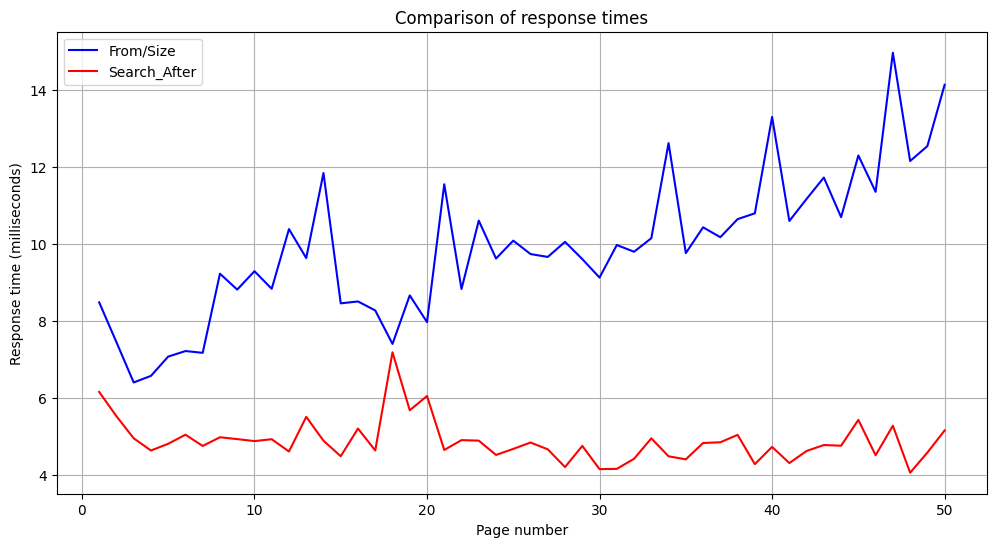

In [209]:
import matplotlib.pyplot as plt

def plot_comparison(from_size_timings, search_after_timings):
    plt.figure(figsize=(12,6))

    pages_from_size , times_from_size = zip(*from_size_timings)
    page_search_after, times_search_after = zip(*search_after_timings)

    plt.plot(pages_from_size, times_from_size,"b-", label='From/Size')
    plt.plot(page_search_after, times_search_after,"r-", label='Search_After')

    plt.xlabel("Page number")
    plt.ylabel("Response time (milliseconds)")
    plt.title("Comparison of response times")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_comparison(from_size_timings,times_search_after)

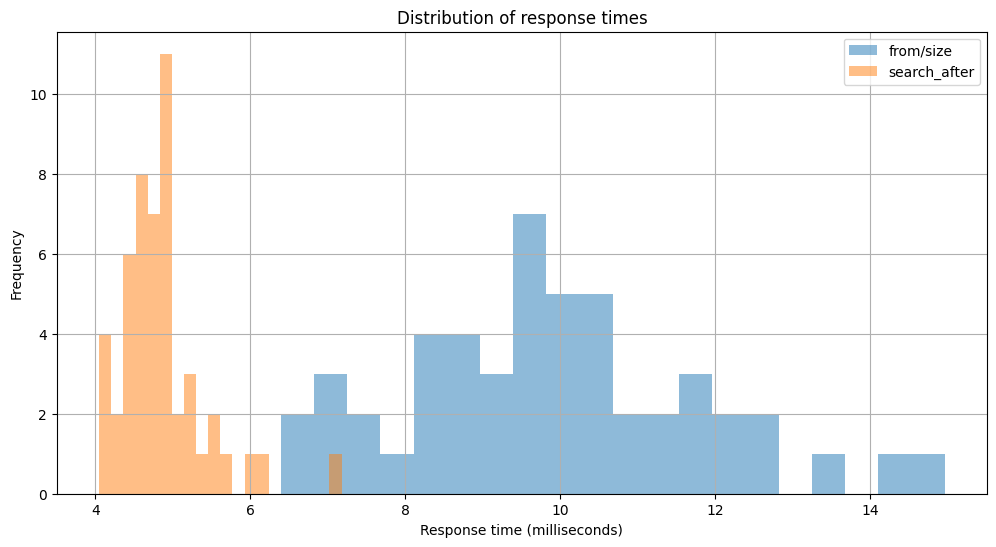

In [210]:
plt.figure(figsize=(12,6))
_, times_from_size = zip(*from_size_timings)
_, times_search_after = zip(*times_search_after)

plt.hist(times_from_size,alpha=0.5,label="from/size",bins=20)
plt.hist(times_search_after,alpha=0.5, label="search_after", bins=20)
plt.xlabel("Response time (milliseconds)")
plt.ylabel("Frequency")
plt.title("Distribution of response times")
plt.legend()
plt.grid(True)
plt.show()

In [211]:
response = es.ingest.put_pipeline(
    id='lowercase_pipeline',
    description="This pipeline transforms the text to lowercase",
    processors=[
        {
            "lowercase": {
                "field":"text"
            }
        }
    ]
)

pprint(response.body)

{'acknowledged': True}


In [212]:
response = es.ingest.get_pipeline(
    id="lowercase_pipeline"
)
pprint(response.body)

{'lowercase_pipeline': {'description': 'This pipeline transforms the text to '
                                       'lowercase',
                        'processors': [{'lowercase': {'field': 'text'}}]}}


In [213]:
response = es.ingest.delete_pipeline(id="lowercase_pipeline")
pprint(response.body)

{'acknowledged': True}


In [214]:
response = es.ingest.put_pipeline(
    id='lowercase_pipeline',
    description="This pipeline transforms the text to lowercase",
    processors=[
        {
            "lowercase": {
                "field":"text"
            }
        }
    ]
)

pprint(response.body)

{'acknowledged': True}


In [215]:
response = es.ingest.simulate(
    id="lowercase_pipeline",
    docs=[
        {
            "_index":"my_index",
            "_id": "1",
            "_source": {
                "text": "Hello World"
            }
        }
    ]
)

pprint(response.body)

{'docs': [{'doc': {'_id': '1',
                   '_index': 'my_index',
                   '_ingest': {'timestamp': '2024-12-19T04:03:45.337726502Z'},
                   '_source': {'text': 'hello world'},
                   '_version': '-3'}}]}


In [216]:
for i , document in enumerate(dummy_data):
    document['text'] = document['text'].upper()
    dummy_data[i] = document

dummy_data

[{'title': 'Sample Title 1',
  'text': 'THIS IS THE FIRST SAMPLE DOCUMENT TEXT.',
  'created_on': '2024-09-22'},
 {'title': 'Sample Title 2',
  'text': 'HERE IS ANOTHER EXAMPLE OF A DOCUMENT.',
  'created_on': '2024-09-24'},
 {'title': 'Sample Title 3',
  'text': 'THE CONTENT OF THE THIRD DOCUMENT GOES HERE.',
  'created_on': '2024-09-24'}]

In [217]:
es.indices.delete(index="my_index", ignore_unavailable=True)
es.indices.create(index="my_index")

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'my_index'})

In [218]:
operations = []

for document in dummy_data:
    operations.append({"index": {"_index": "my_index"}})
    operations.append(document)

response = es.bulk(operations=operations, pipeline="lowercase_pipeline")
pprint(response.body)

{'errors': False,
 'ingest_took': 0,
 'items': [{'index': {'_id': 'rvEV3ZMBwUvK-SJl-_0m',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 0,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'r_EV3ZMBwUvK-SJl-_0m',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 1,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'sPEV3ZMBwUvK-SJl-_0m',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 2,
                      '_shards': {'failed': 0,

In [219]:
response = es.ingest.put_pipeline(
    id='pipeline_1',
    description="Pipeline with multiple transformations, handling and ignoring failures",
    processors=[
        {
            "lowercase": {
                "field": "text"
            }
        },
        {
            "set": {
                "field": "text",
                "value": "CHANGED BY PIPELINE"
            }
        }
    ]
)

pprint(response.body)

{'acknowledged': True}


In [220]:
response = es.ingest.put_pipeline(
    id="pipeline_2",
    description="Pipeline with multiple transformations, handling and ignoring failure",
    processors=[
        {
            "lowercase": {
                "field": "text",
                "on_failure": [
                    {
                        "set": {
                            "field": "text",
                            "value": "FAILED TO LOWERCASE",
                            "ignore_failure": True
                        }
                    }
                ]
            }
        },
        {
            "set": {
                "field": "new_field",
                "value": "ADD BY PIPELINE",
                "ignore_failure": True
            }
        }
    ]
)

pprint(response.body)

{'acknowledged': True}


In [221]:
document = {
    "title": "Sample Title 4",
    "created_on": "2024-09-25"
}

response = es.index(
    index="my_index",
    pipeline="pipeline_2",
    document=document
)

pprint(response.body)

{'_id': 'sfEV3ZMBwUvK-SJl-_15',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 3,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 1,
 'result': 'created'}


In [222]:
response = es.search(
    index="my_index"
)

hits = response.body['hits']['hits']
for hit in hits:
    print(hit['_source'])

In [223]:
document = {
    "price": "100.50",
    "old_name": "old_value",
    "description": "<p>This is a description with HTML.</p>",
    "username": "UserNAME",
    "category": "books",
    "title": "   Example Title with Whitespace   ",
    "tags": "tag1,tag2,tag3",
    "temporary_field": "This field should be removed"
}

In [224]:
pipeline_body = {
    "description": "Pipeline to demonstrate various ingest processors",
    "processors":[
        {
            "convert": {
                "field": "price",
                "type": "float",
                "ignore_missing":True
            }
        },
        {
            "rename":{
                "field": "old_name",
                "target_field": "new_name"
            }
        },
        {
            "set":{
                "field": "status",
                "value": "active"
            }
        },
        {
            "html_strip": {
                "field": "description"
            }
        },
        {
            "lowercase": {
                "field":"username"
            }
        },
        {
            "uppercase": {
                "field": "category"
            }
        },
        {
            "trim": {
                "field": "title"
            }
        },
        {
            "split": {
                "field": "tags",
                "separator": ","
            }
        },
        {
            "remove":{
                "field": "temporary_field"
            }
        },
        {
            "append":{
                "field": "tags",
                "value": ["new_tag"]
            }
        }
    ]
}

pipeline_id  = "multi_steps_pipeline"
es.ingest.put_pipeline(id=pipeline_id, body=pipeline_body)


ObjectApiResponse({'acknowledged': True})

In [225]:
es.indices.delete(index="my_index", ignore_unavailable=True)
es.indices.create(index="my_index")

response = es.index(index="my_index", document=document,pipeline=pipeline_id)
pprint(response.body)

{'_id': 'svEV3ZMBwUvK-SJl_P2j',
 '_index': 'my_index',
 '_primary_term': 1,
 '_seq_no': 0,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_version': 1,
 'result': 'created'}


In [226]:
response = es.search(index="my_index")
hits = response.body['hits']['hits']

for hit in hits:
    pprint(hit['_source'])

In [227]:
clothes_documents=[
  { "brand": "gucci", "color": "red", "model": "model_1" },
  { "brand": "gucci", "color": "blue", "model": "model_2" },
  { "brand": "gucci", "color": "red", "model": "model_3" },
  { "brand": "gucci", "color": "green", "model": "model_4" },
  { "brand": "gucci", "color": "red", "model": "model_1" },
  { "brand": "gucci", "color": "yellow", "model": "model_2" },
  { "brand": "nike", "color": "red", "model": "model_5" },
  { "brand": "nike", "color": "blue", "model": "model_6" },
  { "brand": "gucci", "color": "blue", "model": "model_3" },
  { "brand": "gucci", "color": "red", "model": "model_4" },
  { "brand": "nike", "color": "red", "model": "model_7" },
  { "brand": "nike", "color": "green", "model": "model_8" },
  { "brand": "gucci", "color": "red", "model": "model_1" },
  { "brand": "adidas", "color": "blue", "model": "model_9" },
  { "brand": "adidas", "color": "red", "model": "model_10" },
  { "brand": "puma", "color": "yellow", "model": "model_11" },
  { "brand": "puma", "color": "red", "model": "model_12" },
  { "brand": "nike", "color": "blue", "model": "model_13" },
  { "brand": "nike", "color": "green", "model": "model_14" },
  { "brand": "adidas", "color": "yellow", "model": "model_15" },
  { "brand": "gucci", "color": "blue", "model": "model_16" },
  { "brand": "gucci", "color": "red", "model": "model_2" },
  { "brand": "adidas", "color": "green", "model": "model_17" },
  { "brand": "puma", "color": "blue", "model": "model_18" },
  { "brand": "nike", "color": "yellow", "model": "model_5" },
  { "brand": "nike", "color": "red", "model": "model_6" },
  { "brand": "adidas", "color": "yellow", "model": "model_8" },
  { "brand": "puma", "color": "red", "model": "model_7" },
  { "brand": "gucci", "color": "green", "model": "model_19" },
  { "brand": "gucci", "color": "blue", "model": "model_20" },
  { "brand": "adidas", "color": "yellow", "model": "model_21" },
  { "brand": "puma", "color": "blue", "model": "model_22" },
  { "brand": "nike", "color": "red", "model": "model_23" },
  { "brand": "gucci", "color": "yellow", "model": "model_24" },
  { "brand": "adidas", "color": "green", "model": "model_25" },
  { "brand": "puma", "color": "red", "model": "model_26" },
  { "brand": "nike", "color": "blue", "model": "model_27" },
  { "brand": "gucci", "color": "red", "model": "model_28" },
  { "brand": "adidas", "color": "yellow", "model": "model_29" },
  { "brand": "puma", "color": "green", "model": "model_30" },
  { "brand": "nike", "color": "red", "model": "model_1" },
  { "brand": "gucci", "color": "blue", "model": "model_2" },
  { "brand": "adidas", "color": "red", "model": "model_3" },
  { "brand": "puma", "color": "yellow", "model": "model_4" },
  { "brand": "nike", "color": "blue", "model": "model_5" },
  { "brand": "gucci", "color": "red", "model": "model_6" },
  { "brand": "adidas", "color": "green", "model": "model_7" },
  { "brand": "puma", "color": "blue", "model": "model_8" },
  { "brand": "nike", "color": "yellow", "model": "model_9" },
  { "brand": "gucci", "color": "green", "model": "model_10" },
  { "brand": "adidas", "color": "blue", "model": "model_11" },
  { "brand": "puma", "color": "red", "model": "model_12" },
  { "brand": "nike", "color": "yellow", "model": "model_13" },
  { "brand": "gucci", "color": "red", "model": "model_14" },
  { "brand": "adidas", "color": "green", "model": "model_15" },
  { "brand": "puma", "color": "yellow", "model": "model_16" },
  { "brand": "nike", "color": "red", "model": "model_17" },
  { "brand": "gucci", "color": "blue", "model": "model_18" },
  { "brand": "adidas", "color": "yellow", "model": "model_19" },
  { "brand": "puma", "color": "green", "model": "model_20" },
  { "brand": "nike", "color": "red", "model": "model_21" },
  { "brand": "gucci", "color": "yellow", "model": "model_22" },
  { "brand": "adidas", "color": "blue", "model": "model_23" },
  { "brand": "puma", "color": "red", "model": "model_24" },
  { "brand": "nike", "color": "green", "model": "model_25" },
  { "brand": "gucci", "color": "red", "model": "model_26" },
  { "brand": "adidas", "color": "blue", "model": "model_27" },
  { "brand": "puma", "color": "yellow", "model": "model_28" },
  { "brand": "nike", "color": "red", "model": "model_29" },
  { "brand": "gucci", "color": "green", "model": "model_30" },
  { "brand": "adidas", "color": "blue", "model": "model_1" },
  { "brand": "puma", "color": "red", "model": "model_2" },
  { "brand": "nike", "color": "yellow", "model": "model_3" },
  { "brand": "gucci", "color": "blue", "model": "model_4" },
  { "brand": "adidas", "color": "red", "model": "model_5" },
  { "brand": "puma", "color": "yellow", "model": "model_6" },
  { "brand": "nike", "color": "green", "model": "model_7" },
  { "brand": "gucci", "color": "red", "model": "model_8" },
  { "brand": "adidas", "color": "blue", "model": "model_9" },
  { "brand": "puma", "color": "yellow", "model": "model_10" },
  { "brand": "nike", "color": "red", "model": "model_11" },
  { "brand": "gucci", "color": "green", "model": "model_12" },
  { "brand": "adidas", "color": "blue", "model": "model_13" },
  { "brand": "puma", "color": "red", "model": "model_14" },
  { "brand": "nike", "color": "yellow", "model": "model_15" },
  { "brand": "gucci", "color": "red", "model": "model_16" },
  { "brand": "adidas", "color": "green", "model": "model_17" },
  { "brand": "puma", "color": "blue", "model": "model_18" },
  { "brand": "nike", "color": "red", "model": "model_19" },
  { "brand": "gucci", "color": "yellow", "model": "model_20" },
  { "brand": "adidas", "color": "blue", "model": "model_21" },
  { "brand": "puma", "color": "green", "model": "model_22" },
  { "brand": "nike", "color": "red", "model": "model_23" },
  { "brand": "gucci", "color": "blue", "model": "model_24" },
  { "brand": "adidas", "color": "yellow", "model": "model_25" },
  { "brand": "puma", "color": "red", "model": "model_26" },
  { "brand": "nike", "color": "blue", "model": "model_27" },
  { "brand": "gucci", "color": "green", "model": "model_28" },
  { "brand": "adidas", "color": "red", "model": "model_29" },
  { "brand": "puma", "color": "yellow", "model": "model_30" }
]

In [228]:
es.indices.delete(index="my_index", ignore_unavailable=True)
es.indices.create(index="my_index")

operations = []
for document in clothes_documents:
    operations.append({"index":{"_index":"my_index"}})
    operations.append(document)

response = es.bulk(operations=operations)
pprint(response.body)

{'errors': False,
 'items': [{'index': {'_id': 's_EV3ZMBwUvK-SJl_f2x',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 0,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'tPEV3ZMBwUvK-SJl_f2x',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 1,
                      '_shards': {'failed': 0, 'successful': 1, 'total': 2},
                      '_version': 1,
                      'result': 'created',
                      'status': 201}},
           {'index': {'_id': 'tfEV3ZMBwUvK-SJl_f2x',
                      '_index': 'my_index',
                      '_primary_term': 1,
                      '_seq_no': 2,
                      '_shards': {'failed': 0, 'successful': 1, '

In [237]:
response = es.search(
    index="my_index",
    body={
        "query": {
            "bool":{
                "filter": [
                    {
                        "term":{
                            "brand":"gucci"
                        }
                    }
                ]
            }
        },
        "aggs":{
            "colors":{
                "terms":{
                    "field":"color.keyword"
                }
            },
            "color_red":{
                "filter":{
                    "term":{
                        "color.keyword": "red"
                    }
                },
                "aggs":{
                    "models":{
                        "terms":{
                            "field":"model.keyword"
                        }
                    }
                }
            }
        },
        "post_filter":{
            "term":{
                "color":"red"
            }
        },
        "size":20
    }
)

hits = response.body['hits']['hits']
pprint(f"Found {len(hits)} documents")

'Found 12 documents'


In [238]:
response.body['aggregations']['color_red']['models']['buckets']

[{'key': 'model_1', 'doc_count': 3},
 {'key': 'model_14', 'doc_count': 1},
 {'key': 'model_16', 'doc_count': 1},
 {'key': 'model_2', 'doc_count': 1},
 {'key': 'model_26', 'doc_count': 1},
 {'key': 'model_28', 'doc_count': 1},
 {'key': 'model_3', 'doc_count': 1},
 {'key': 'model_4', 'doc_count': 1},
 {'key': 'model_6', 'doc_count': 1},
 {'key': 'model_8', 'doc_count': 1}]

In [239]:
response.body['aggregations']['colors']['buckets']

[{'key': 'red', 'doc_count': 12},
 {'key': 'blue', 'doc_count': 8},
 {'key': 'green', 'doc_count': 6},
 {'key': 'yellow', 'doc_count': 4}]